In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import os

### Loading the dataset

In [60]:
# Get the current working directory
current_directory = os.getcwd()

# Construct the file path using os.path.join
file_path = os.path.join(current_directory, 'Battery_RUL.csv')

# Load the dataset
dataset = pd.read_csv(file_path)

### Preprocessing

In [61]:
# Define the features and target
X = dataset.drop("Cycle_Index", axis=1).drop("RUL", axis=1)
y = dataset["RUL"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Training

In [62]:
# SVR model
model = SVR(kernel='rbf')

# Fit the model
model.fit(x_train, y_train)

SVR()

### Predicting

In [63]:
y_pred = model.predict(x_test)

### Model Evaluation

In [64]:
# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R2 accuracy: {r2 * 100:.2f}%')

R2 accuracy: 14.02%


# Model Performance Visualization

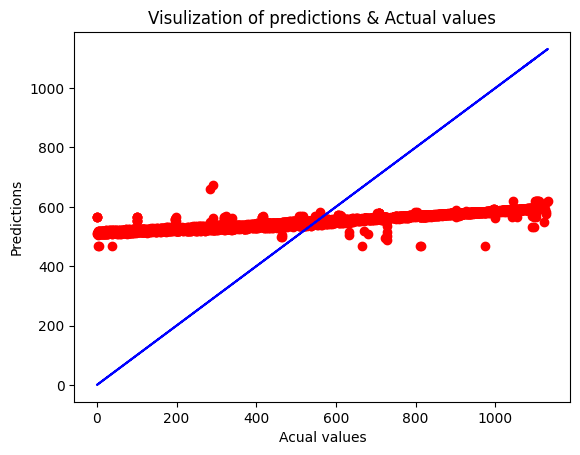

In [65]:
plt.plot(y_test, y_test, color='blue')
plt.scatter(y_test, y_pred, color='red')
plt.title('Visulization of predictions & Actual values')
plt.xlabel('Acual values')
plt.ylabel('Predictions')
plt.show()

# Error Distribution

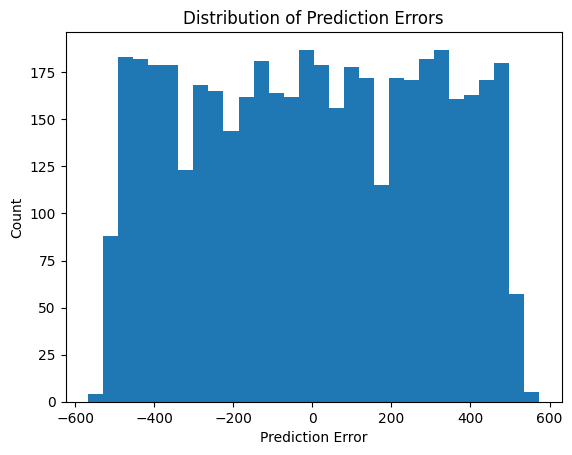

In [66]:
# Calculate the errors
errors = y_test - y_pred

plt.hist(errors, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.show()